In [1]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


import os

from sklearn import metrics   #Additional scklearn functions

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (16, 8)
#print(__doc__)
import matlab.engine


In [ ]:
os.getcwd()
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/')
eng = matlab.engine.start_matlab()
eng.reading_hotspot2Data_v4(nargout=0)
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication/')
os.getcwd()

In [2]:
X=pd.read_csv('train_whole.csv',header=None)
y=pd.read_csv('label_whole.csv',header=None)

X_train = pd.read_csv('train.csv',header=None)
#X_valid = pd.read_csv('valid.csv',header=None)

y_train=pd.read_csv('label_train2.csv',header=None)
#y_valid=pd.read_csv('label_valid2.csv',header=None)

X_test=pd.read_csv('test.csv',header=None)
y_test=pd.read_csv('label_test2.csv',header=None)

X_train=X_train.T#transpose
#X_valid=X_valid.T
X=X.T
X_test=X_test.T

y_train=y_train.values.ravel()
#y_valid=y_valid.values.ravel()
y=y.values.ravel()
y_test=y_test.values.ravel()

print(X_train.shape)
#print(X_valid.shape)
print(y_train.shape)
#print(y_valid.shape)

(250, 58)
(63, 58)
(250,)
(63,)


In [4]:


n_estimator_value=200
max_depth_value=5


In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=max_depth_value, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimator_value,
            oob_score=False, random_state=0, verbose=0, warm_start=False)  
classifier.fit(X, y) 
y_test_pred = classifier.predict(X_test)

In [7]:
from sklearn.cross_validation import cross_val_score

Acc=cross_val_score(classifier, X, y, scoring='accuracy',
          cv=5)
 


Sen=cross_val_score(classifier, X, y, scoring='recall',
          cv=5)
Sen.mean()  

Prec=cross_val_score(classifier, X, y, scoring='precision',
          cv=5)
Prec.mean()  

F1=cross_val_score(classifier, X, y, scoring='f1',
          cv=5)
F1.mean()  

AUC=cross_val_score(classifier, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  


from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(classifier.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)


MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))


tp: 13.600


tn: 28.400


fp: 7.600


fn: 13.000




In [8]:
print('Sensitivity: %.3f' % Sen.mean() )
print('Specificity: %.3f' %specificity)
print('Accuracy: %.3f' % Acc.mean() )
print('Precision: %.3f' % Prec.mean() )
print('F1: %.3f' % F1.mean() )
print('MCC:%.3f' %MCC)
print('AUC: %.3f' % AUC.mean() )

Sensitivity: 0.511
Specificity: 0.789
Accuracy: 0.671
Precision: 0.647
F1: 0.570
MCC:0.314
AUC: 0.726


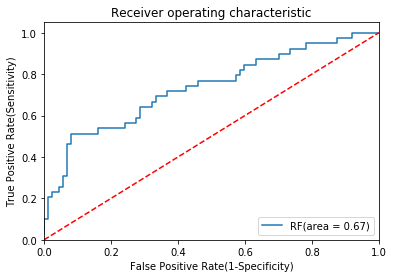

In [5]:
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, y_test_pred)
# predict probabilities

probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label='RF(area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()



In [6]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of RF classifier: {:.2f}'.format(classifier.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity1=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of RF classifier: 0.72


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       70       18
Predicted Class 0       17       21




[[70 18]
 [17 21]]
Specificity : 0.8045977011494253


Precision score: 0.5526315789473685


Recall or Sensitivity: 0.5384615384615384


F1 Score: 0.5454545454545455


Matthews Correlation Coefficient: 0.34556354141669504


AUC: 0.734


